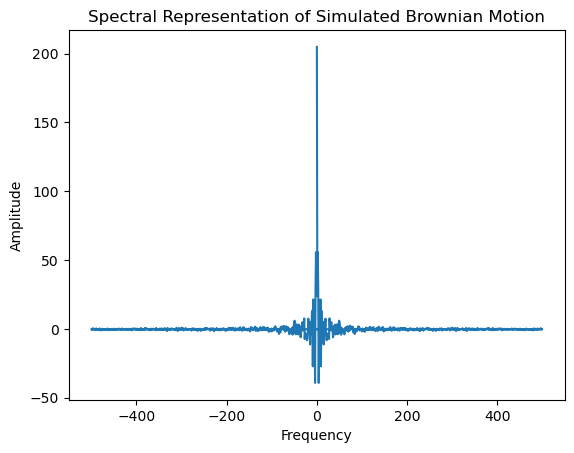

In [2]:
### Euler-Maruyama generation of Brownian motion
import numpy as np
import matplotlib.pyplot as plt

# Euler-Maruyama parameters
T = 1.0
N = 1000
dt = T/N

# Brownian motion simulation using Euler-Maruyama
W = np.zeros(N)
for i in range(1, N):
    W[i] = W[i-1] + np.sqrt(dt) * np.random.normal()

# Fourier Transform of the simulated process
W_fft = np.fft.fft(W)

# Plotting the real part of the Fourier Transform
freq = np.fft.fftfreq(N, dt)
plt.plot(freq, np.real(W_fft))
plt.title('Spectral Representation of Simulated Brownian Motion')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from numpy.fft import fft, fftfreq

# Function to generate and sample the signal, and plot the frequency spectrum
def plot_signal_frequency(signal_freq, sampling_rate):
    '''This code generates a plot widget of a signal and noise frequency.'''
        
    # Time domain parameters
    t_max = 1  # Duration in seconds
    t = np.linspace(0, t_max, int(sampling_rate * t_max), endpoint=False)
    
    # Euler-Maruyama parameters
    dt = t_max/len(t)

    # Brownian motion simulation using Euler-Maruyama
    W = np.zeros(len(t))
    for i in range(1, len(t)):
        W[i] = W[i-1] + np.sqrt(dt) * np.random.normal()

    # Generating a sine wave signal
    signal = np.sin(2 * np.pi * signal_freq * t)
    # Sine and Noise
    signal_noise = signal + W

    # Compute the Fourier Transform and the frequency bins
    signal_fft = fft(signal_noise)
    freq = fftfreq(t.size, d=1/sampling_rate)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plotting the magnitude of the frequency components
    plt.plot(freq, np.abs(signal_fft))
    plt.title(f"Frequency Spectrum (Signal Frequency: {signal_freq} Hz, Sampling Rate: {sampling_rate} Hz)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, max(signal_freq * 2, sampling_rate / 2))  # Limiting x-axis to relevant range
    plt.grid(True)
    plt.show()

# Interactive widget
interact(plot_signal_frequency,
         signal_freq=FloatSlider(value=5, min=1, max=50, step=1, description='Signal Frequency (Hz)'),
         sampling_rate=FloatSlider(value=40, min=10, max=100, step=1, description='Sampling Rate (Hz)'))


interactive(children=(FloatSlider(value=5.0, description='Signal Frequency (Hz)', max=50.0, min=1.0, step=1.0)…

<function __main__.plot_signal_frequency(signal_freq, sampling_rate)>

In [8]:
def plot_signal_frequency_with_noise_limit(signal_freq, sampling_rate, noise_bandlimit):
    # Time domain parameters
    t_max = 1  # Duration in seconds
    t = np.linspace(0, t_max, int(sampling_rate * t_max), endpoint=False)
    
    # Generating a sine wave signal
    signal = np.sin(2 * np.pi * signal_freq * t)

    # Generating noise with a specified bandlimit
    # Create noise in frequency domain and then convert it back to time domain
    noise_freq_domain = np.random.normal(0, 1, len(t))
    frequencies = fftfreq(len(t), d=1/sampling_rate)

    # Apply bandlimit to noise in frequency domain
    noise_freq_domain[np.abs(frequencies) > noise_bandlimit] = 0
    noise_time_domain = np.fft.ifft(noise_freq_domain).real

    # Sine and Bandlimited Noise
    signal_noise = signal + noise_time_domain

    # Compute the Fourier Transform and the frequency bins
    signal_fft = fft(signal_noise)
    freq = fftfreq(t.size, d=1/sampling_rate)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plotting the magnitude of the frequency components
    plt.plot(freq, np.abs(signal_fft))
    plt.title(f"Frequency Spectrum (Signal Frequency: {signal_freq} Hz, Sampling Rate: {sampling_rate} Hz, Noise Bandlimit: {noise_bandlimit} Hz)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, max(signal_freq * 2, sampling_rate / 2))  # Limiting x-axis to relevant range
    plt.grid(True)
    plt.show()

# Interactive widget
interact(plot_signal_frequency_with_noise_limit,
         signal_freq=FloatSlider(value=5, min=1, max=50, step=1, description='Signal Frequency (Hz)'),
         sampling_rate=FloatSlider(value=40, min=10, max=100, step=1, description='Sampling Rate (Hz)'),
         noise_bandlimit=FloatSlider(value=30, min=10, max=100, step=1, description='Noise Bandlimit (Hz)'))


interactive(children=(FloatSlider(value=5.0, description='Signal Frequency (Hz)', max=50.0, min=1.0, step=1.0)…

<function __main__.plot_signal_frequency_with_noise_limit(signal_freq, sampling_rate, noise_bandlimit)>

For a stochastic process such as this, there is hardly a difference between noises with higher or lower bandwidth than the Nyquist limit.

To consider high-dimensional noise, we should use Langevin Monte Carlo (LMC) with the Metropolis-Hastings adjustment.

It seems an imminent necessity considering some high-dimensional noises projected onto a 1D mapping.